In [ ]:
import numpy as np
import pandas as pd
import pydicom
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf
from keras.preprocessing import image
from skimage import transform
from PIL import Image

In [2]:
# This function reads in a .dcm file, checks the important fields for our device, and returns a numpy array
# of just the imaging data
def check_dicom(filename): 
    print('Load file {} ...'.format(filename))
    ds = pydicom.dcmread(filename)       
    img = ds.pixel_array
    return img
    
    
# This function takes the numpy array output by check_dicom and 
# runs the appropriate pre-processing needed for our model input
def preprocess_image(img,img_mean,img_std,img_size): 
    resized_img = transform.resize(img, (img_size[1],img_size[2]))
    rgb_img = Image.fromarray(resized_img).convert('RGB')
    sub_img = np.array(rgb_img) - img_mean
    normalized_img = sub_img / img_std
    proc_img = preprocess_input(normalized_img)
    proc_img = np.expand_dims(proc_img, axis=0)
    
    return proc_img

# This function loads in our trained model w/ weights and compiles it 
def load_model(model_path, weight_path):
    with open('my_model.json', 'r') as json_file:
        model_json = json_file.read()
        model = keras.models.model_from_json(model_json)
        model.load_weights(weight_path)
    
    return model

# This function uses our device's threshold parameters to predict whether or not
# the image shows the presence of pneumonia using our trained model
def predict_image(model, img, thresh): 
    pred_y = model.predict(img)
    if (pred_y) > thresh:
        print('PNEUMONIA DETECTED')
    else:
        print('NO PNEUMONIA')


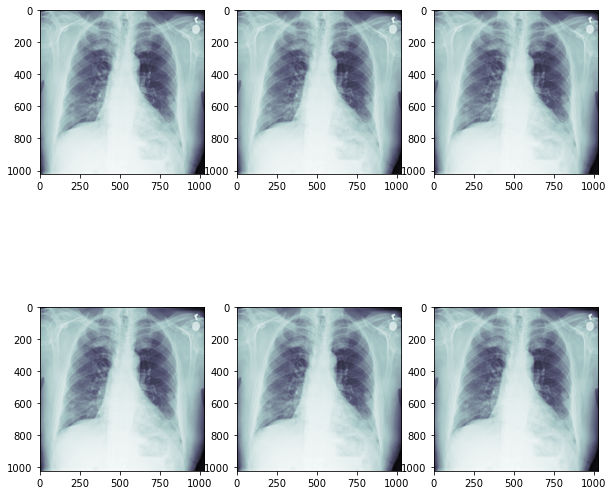

In [3]:
test_dicoms = ['test1.dcm','test2.dcm','test3.dcm','test4.dcm','test5.dcm','test6.dcm']

fig, axes = plt.subplots(2,3, figsize=(10,10))
for img, ax in zip(test_dicoms, axes.flatten()):
    ds = pydicom.dcmread("test1.dcm")        
    img = ds.pixel_array
    ax.imshow(img, cmap='bone')                    

In [4]:
model_path = 'my_model.json' #path to saved model
weight_path = 'xray_class_my_model.best.hdf5' #path to saved best weights

IMG_SIZE=(1,224,224,3) # This might be different if you did not use vgg16
img_mean = 5.77 # loads the mean image value they used during training preprocessing
img_std = 14.69 # loads the std dev image value they used during training preprocessing

my_model = load_model(model_path, weight_path)  #loads model
thresh = 0.51 #loads the threshold they chose for model classification 

# use the .dcm files to test your prediction
for i in test_dicoms:
    
    img = np.array([])
    img = check_dicom(i)
    
    if img is None:
        continue
        
    img_proc = preprocess_image(img,img_mean,img_std,IMG_SIZE)
    pred = predict_image(my_model,img_proc,thresh)
    print(pred)

Load file test1.dcm ...
PNEUMONIA DETECTED
None
Load file test2.dcm ...
PNEUMONIA DETECTED
None
Load file test3.dcm ...
PNEUMONIA DETECTED
None
Load file test4.dcm ...
PNEUMONIA DETECTED
None
Load file test5.dcm ...
PNEUMONIA DETECTED
None
Load file test6.dcm ...
PNEUMONIA DETECTED
None
